In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import pandas as pd
import time

Decision Tree Metrics:
Accuracy: 0.7608
Precision: 0.7361
Recall: 0.6310

Random Forest Metrics:
Accuracy: 0.7656
Precision: 0.7612
Recall: 0.6071


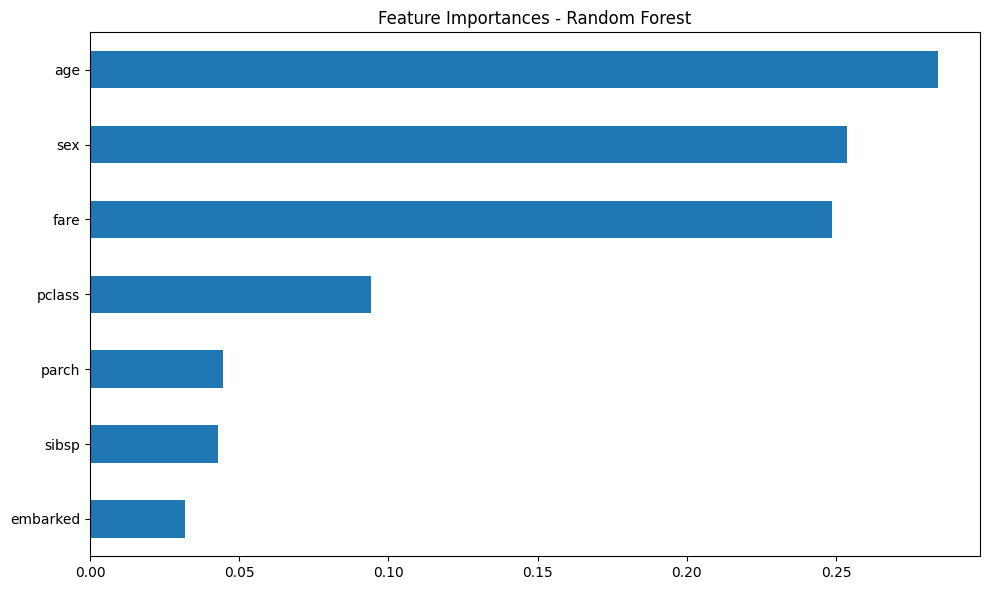

In [9]:
'''
 Random Forest vs Decision Tree
● Train a RandomForestClassifier on the same dataset used for Task 5.
● Compare accuracy, precision, and recall with the standalone decision tree.
● Plot feature importances.

'''

titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame.copy()
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'ticket', 'name'])
df = df.dropna()

label_encoders = {}
for column in df.select_dtypes(include='category').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns='survived')
y = df['survived'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, dt_preds):.4f}")
print(f"Precision: {precision_score(y_test, dt_preds):.4f}")
print(f"Recall: {recall_score(y_test, dt_preds):.4f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"Precision: {precision_score(y_test, rf_preds):.4f}")
print(f"Recall: {recall_score(y_test, rf_preds):.4f}")

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='barh', figsize=(10, 6), title='Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()






In [10]:
'''
 AdaBoost or Gradient Boosting
● Train an AdaBoostClassifier or GradientBoostingClassifier.
● Use a suitable dataset.
● Compare it with Random Forest and Decision Tree in terms of:
○ Accuracy
○ F1-score
○ Training time (optional)


'''

titanic = fetch_openml(name='titanic', version=1, as_frame=True)
df = titanic.frame.copy()
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest', 'ticket', 'name'])
df = df.dropna()

for col in df.select_dtypes(include='category').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns='survived')
y = df['survived'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

start = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
preds_dt = dt.predict(X_test)
results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, preds_dt),
    "F1 Score": f1_score(y_test, preds_dt),
    "Train Time": time.time() - start
}

start = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)
results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, preds_rf),
    "F1 Score": f1_score(y_test, preds_rf),
    "Train Time": time.time() - start
}

start = time.time()
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
preds_ada = ada.predict(X_test)
results["AdaBoost"] = {
    "Accuracy": accuracy_score(y_test, preds_ada),
    "F1 Score": f1_score(y_test, preds_ada),
    "Train Time": time.time() - start
}

df_results = pd.DataFrame(results).T
print(df_results)

               Accuracy  F1 Score  Train Time
Decision Tree  0.760766  0.679487    0.045019
Random Forest  0.765550  0.675497    0.617771
AdaBoost       0.789474  0.710526    0.263047
